# Librerías y funciones

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1. Modulo de adquisición de datos

In [13]:
class DataAdquisition:
    def __init__(self, mode = "offline", start_index = 10) -> None:
        self.mode = mode
        self.start_index = start_index
        self.current_index = start_index
        
        if self.mode == "offline":
            data_path = "data/AEX.csv"
            self.load_from_csv(data_path)
    
    def step(self):
        # Si llegamos al final:
        if not self.current_index < len(self.data) - 1:
            # Hemos llegado al final
            return [], True
        
        if self.mode == "offline":
            obs = self.get_current_data()
            
        #print("Current DataAdquisition index: " + str(self.current_index))
        
        self.current_index += 1
        
        return obs, False

    def get_current_data(self):
        return self.data.iloc[self.current_index]
    
    def load_from_csv(self, data_path):
        try:
            df = pd.read_csv(data_path)
            self.data = df
        except Exception as e:
            print("Error: " + str(e))
            
    

# 2. Definición de las compañías

In [14]:
class Company():
    def __init__(self, share_price = 10, option_price = 10):
        self.name = None
        self.share_price = share_price
        self.option_price = option_price
        self.n_shares = 100
        
        
        self.share: Share = Share(name = self.name, price = share_price, quantity = self.n_shares)   
        self.option: Option = Option(name = self.name, price = option_price, expiration_date = None)   
        self.deuda = 0                                          # Deuda inicial de la empresa    
        
    
    
        

# 3. Definición de acciones y optiones

In [15]:
class share():
    def __init__(self, name, price, quantity):
        self.name = name           # Nombre de la acción
        self.price = price         # Precio actual de la acción
        self.quantity = quantity   # Cantidad de acciones disponibles

    def update_price(self, new_price):
        self.price = new_price     # Método para actualizar el precio de la acción
        
class option():
    def __init__(self, name, price, expiration_date):
        self.name = name                    # Nombre de la opción
        self.price = price                  # Precio actual de la opción
        self.expiration_date = expiration_date   # Fecha de vencimiento de la opción

    def update_price(self, new_price):
        self.price = new_price            # Método para actualizar el precio de la opción
        

# 4. Definicion del mercado


In [16]:
class Market():
    def __init__(self, dataAdquisition: DataAdquisition = DataAdquisition("offline")):
        self.dataAdquisition = dataAdquisition
        self.companies = []
        self.timestep = 0
        self.plot_created = False
        
        
    def _initialize_variables(self):
        obs = []
        self.timestep = 0
        self.plot_created = False
        self._initialize_fig()
        return obs
        
    def reset(self):
        obs = self._initialize_variables()
        print("Reseting...")
        return obs, False
    
    def step(self, action):
        # next_obs = []
        next_obs = self.dataAdquisition.step()
        rewards = {}
        total_reward = 0
        done = False
        self.dataAdquisition.step()
        self.timestep += 1
        if self.timestep > 100:
            done = True
        return next_obs, total_reward, rewards, done
    
    def render_old(self):
        current_data = self.dataAdquisition.get_current_data()
        if current_data is not None:
            #print("Estado actual del mercado:")
            # print(current_data)
            df = current_data
            df["High"].plot(), df["Low"].plot()
        else:
            print("No hay datos disponibles para renderizar en el mercado.")
            
    def _initialize_fig(self):
        # Si el gráfico no ha sido creado todavía, crearlo y mostrar el primer punto
        self.fig = plt.figure()
        self.ax = self.fig.add_subplot(211)
        self.ax.set_title("Estado actual del mercado")
        self.ax.set_xlabel("Paso")
        self.ax.set_ylabel("Precio")
        self.ax.grid()
        self.plot_created = True
            
    def render(self):
        
        current_data = self.dataAdquisition.get_current_data()["Close"]
        print("Rendering..." + str(self.timestep) + " and data: " + str(current_data))
        #print(current_data)
        #print(self.plot_created)
        #print("Timestep: " + str(self.timestep))
        if current_data is not None:
            if not self.plot_created:
                self.plot_created = True
                
            #self.ax.plot(self.timestep, current_data, 'ro')  # Crear un punto rojo
            
    
            # self.timestep += 1
            # Si el gráfico ya fue creado, simplemente añadir un punto al gráfico existente
            self.ax.plot(self.timestep, current_data, 'ro')  # Añadir un punto rojo
            plt.pause(0.01)  # Pausa para actualizar el gráfico
        else:
            print("No hay datos disponibles para renderizar en el mercado.")


# 5. Definición de la estrategia

In [17]:
class Strategy():
    def __init__(self):
        pass

# 6. Definición del broker

In [18]:
np.random.randint(3) # Da 0, 1 o 2 de manera aleatoria, para generar acciones aleatorias

1

In [19]:
class Broker():
    def __init__(self, strategy: Strategy, capital: float = 1000, portfolio= None):
        self.strategy = strategy
        self.capital = capital # Por defecto 1000 euros
        
    def predict(self, obs):
        """_summary_
            Predicts the next action:
                - 0: hold
                - 1: buy
                - 2: sell
        Returns:
            int: Hold, buy or sell action
        """
        action = np.random.randint(3)
        
        return action
        
    def buy_share(self, option):
        pass
    
    def sell_share(self, option):
        pass
    
    def buy_option(self, option):
        pass
    
    def sell_option(self, option):
        pass

# 7. Definicion del portfolio
El porfolio será una clase heredada del broker que llevará la gestión del capital y las acciones/optiones del broker

In [20]:
class Portfolio(Broker):
    def __init__(self, strategy: Strategy, capital: float = 1000):
        super().__init__(strategy, capital)
        self.shares = []
        self.options = []
        
    def update_capital(self, reward):
        self.capital += reward
        
    def add_share(self, company):
        pass
    
    def remove_share(self):
        pass

    def add_option(self):
        pass
    
    def remove_option(self):
        pass        

# 8. Main loop

In [21]:
def main():
    # Configuración inicial. Esto en un futuro saldrá de un json
    initial_capital = 1000 # En euros
    num_episodes = 5 # numero de episodios, ya sean dias, semanas, o lo que sea el dt que represente el método step de la clase market
    
    
    # Se instancia la estrategia
    strategy = Strategy()
    
    # Se instancia el portfolio
    portfolio = Portfolio(strategy = strategy, capital = initial_capital)
    
    # Se instancia el broker
    broker = Broker(strategy = strategy, capital = initial_capital, portfolio = portfolio)
    
    # Definimos el mercado
    market = Market()
    
    for episode in range(num_episodes):
        obs, done = market.reset()
        print("Comenzando simulación...")
        while not done:
            action = broker.predict(obs)
            next_obs, total_reward, rewards, done = market.step(action)
            obs = next_obs
            market.render()
        print("Simulación terminada con éxito")

# Test

Reseting...
Comenzando simulación...
Rendering...1 and data: 755.450012


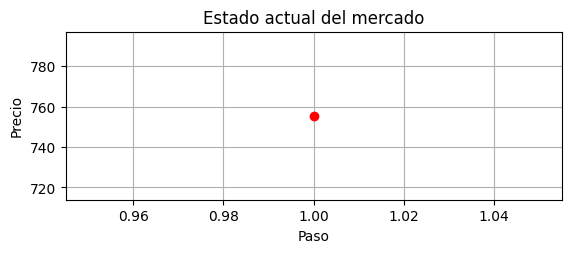

Rendering...2 and data: 752.599976
Rendering...3 and data: 744.309998
Rendering...4 and data: 741.219971
Rendering...5 and data: 752.679993
Rendering...6 and data: 748.289978
Rendering...7 and data: 752.98999
Rendering...8 and data: 756.219971
Rendering...9 and data: 765.280029
Rendering...10 and data: 767.609985
Rendering...11 and data: 754.130005
Rendering...12 and data: 767.859985
Rendering...13 and data: 756.669983
Rendering...14 and data: 756.349976
Rendering...15 and data: 763.340027
Rendering...16 and data: 761.609985
Rendering...17 and data: 759.320007
Rendering...18 and data: 767.710022
Rendering...19 and data: 772.640015
Rendering...20 and data: 768.97998
Rendering...21 and data: 759.159973
Rendering...22 and data: 756.599976
Rendering...23 and data: 760.559998
Rendering...24 and data: 768.940002
Rendering...25 and data: 776.440002
Rendering...26 and data: 769.890015
Rendering...27 and data: 753.52002
Rendering...28 and data: 755.820007
Rendering...29 and data: 774.799988
Ren

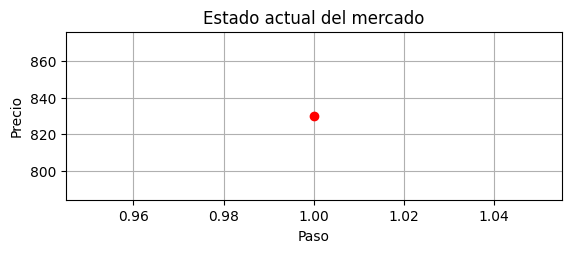

Rendering...2 and data: 851.77002
Rendering...3 and data: 842.619995
Rendering...4 and data: 847.590027
Rendering...5 and data: 855.849976
Rendering...6 and data: 846.789978
Rendering...7 and data: 854.969971
Rendering...8 and data: 852.97998
Rendering...9 and data: 848.440002
Rendering...10 and data: 856.549988
Rendering...11 and data: 857.02002
Rendering...12 and data: 861.960022
Rendering...13 and data: 860.969971
Rendering...14 and data: 858.75
Rendering...15 and data: 853.76001
Rendering...16 and data: 860.539978
Rendering...17 and data: 876.340027
Rendering...18 and data: 878.400024
Rendering...19 and data: 881.780029
Rendering...20 and data: 884.049988
Rendering...21 and data: 884.169983
Rendering...22 and data: 884.169983
Rendering...23 and data: 884.169983
Rendering...24 and data: 884.169983
Rendering...25 and data: 884.169983
Rendering...26 and data: 884.169983
Rendering...27 and data: 884.169983
Rendering...28 and data: 884.169983
Rendering...29 and data: 884.169983
Renderin

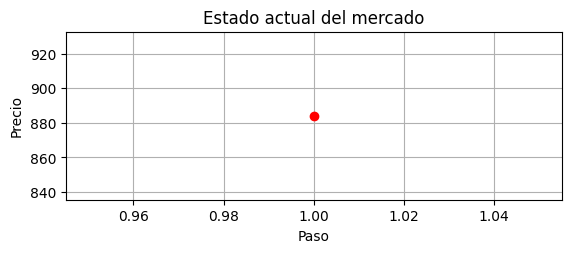

Rendering...2 and data: 884.169983
Rendering...3 and data: 884.169983
Rendering...4 and data: 884.169983
Rendering...5 and data: 884.169983
Rendering...6 and data: 884.169983
Rendering...7 and data: 884.169983
Rendering...8 and data: 884.169983
Rendering...9 and data: 884.169983
Rendering...10 and data: 884.169983
Rendering...11 and data: 884.169983
Rendering...12 and data: 884.169983
Rendering...13 and data: 884.169983
Rendering...14 and data: 884.169983
Rendering...15 and data: 884.169983
Rendering...16 and data: 884.169983
Rendering...17 and data: 884.169983
Rendering...18 and data: 884.169983
Rendering...19 and data: 884.169983
Rendering...20 and data: 884.169983
Rendering...21 and data: 884.169983
Rendering...22 and data: 884.169983
Rendering...23 and data: 884.169983
Rendering...24 and data: 884.169983
Rendering...25 and data: 884.169983
Rendering...26 and data: 884.169983
Rendering...27 and data: 884.169983
Rendering...28 and data: 884.169983
Rendering...29 and data: 884.169983


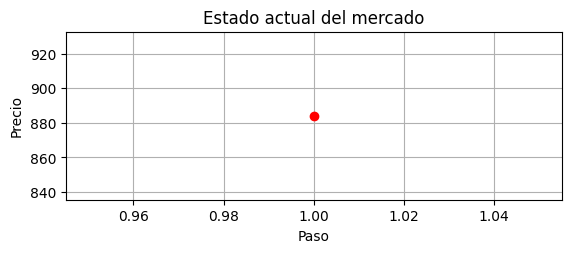

Rendering...2 and data: 884.169983
Rendering...3 and data: 884.169983
Rendering...4 and data: 884.169983
Rendering...5 and data: 884.169983
Rendering...6 and data: 884.169983
Rendering...7 and data: 884.169983
Rendering...8 and data: 884.169983
Rendering...9 and data: 884.169983
Rendering...10 and data: 884.169983
Rendering...11 and data: 884.169983
Rendering...12 and data: 884.169983
Rendering...13 and data: 884.169983
Rendering...14 and data: 884.169983
Rendering...15 and data: 884.169983
Rendering...16 and data: 884.169983
Rendering...17 and data: 884.169983
Rendering...18 and data: 884.169983
Rendering...19 and data: 884.169983
Rendering...20 and data: 884.169983
Rendering...21 and data: 884.169983
Rendering...22 and data: 884.169983
Rendering...23 and data: 884.169983
Rendering...24 and data: 884.169983
Rendering...25 and data: 884.169983
Rendering...26 and data: 884.169983
Rendering...27 and data: 884.169983
Rendering...28 and data: 884.169983
Rendering...29 and data: 884.169983


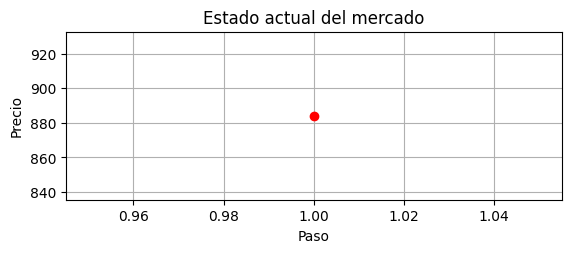

Rendering...2 and data: 884.169983
Rendering...3 and data: 884.169983
Rendering...4 and data: 884.169983
Rendering...5 and data: 884.169983
Rendering...6 and data: 884.169983
Rendering...7 and data: 884.169983
Rendering...8 and data: 884.169983
Rendering...9 and data: 884.169983
Rendering...10 and data: 884.169983
Rendering...11 and data: 884.169983
Rendering...12 and data: 884.169983
Rendering...13 and data: 884.169983
Rendering...14 and data: 884.169983
Rendering...15 and data: 884.169983
Rendering...16 and data: 884.169983
Rendering...17 and data: 884.169983
Rendering...18 and data: 884.169983
Rendering...19 and data: 884.169983
Rendering...20 and data: 884.169983
Rendering...21 and data: 884.169983
Rendering...22 and data: 884.169983
Rendering...23 and data: 884.169983
Rendering...24 and data: 884.169983
Rendering...25 and data: 884.169983
Rendering...26 and data: 884.169983
Rendering...27 and data: 884.169983
Rendering...28 and data: 884.169983
Rendering...29 and data: 884.169983


In [22]:
main()

In [11]:
def name(x=None):
    y = x or "paco"
    print(y)
    

In [12]:
name("Francisco")
name()

Francisco
paco
